### Allan Magno E. Pecundo
### 123103
### March 27, 2021

## Create Station class that simulates processes occurring at the train station

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class Station:
    
    
    def __init__(self, station_name, rate_arrival, rate_offboarding):#DONE
        
        
        """
        station_name: (String) indicating the name assigned to the station
        rate_arrival: (Numeric) the number of people onboarding at a given time
        rate_offboarding: (Numeric) a percentage representing the proportion of passengers expected to offboard the train at the given station

        
        """
        
        #Keeps track of current station name
        
        self.station_name = station_name
        self.rate_arrival= rate_arrival
        self.rate_offboarding = rate_offboarding
        self.time = 0 #Tracks time at a station for arrivals method
        self.simtime = 0 #Tracks time during simulations
        self.waiting_timeframe = []
        
        self.timearray = []
        self.queuearray = []
        self.arrival_times = []
        self.waiting_times = []
        
    def update_time(self): #DONE
        
        #This update time is used for checking the simulations. Not really part of the process
        
        
        return self.simtime
        
    
    def waiting_time(self, train):
        
        #Records the waiting time of the passengers boarding the train by subtracting the time they arrive at the station from the time they onboard the train, as it leaves the station.
        #The waiting times are saved as an array per passenger arriving.
        
        import numpy as np
        
        arrivals = [x for x in self.arrival_times if x < train.time]
        
        waiting_times = [train.time - x for x in arrivals]
        
        self.waiting_timeframe.append(train.time)
        
        self.waiting_times = self.waiting_times + waiting_times
        
        
        
        
    def arrivals(self, time_limit): #DONE
        
        #Generates the arrivals of the passengers. Passengers are represented as an array of arrival times, with each arrival time representing the passenger
        
        import numpy as np
    
        
        arrival_times = []
        
        if self.rate_arrival == 0: #Provide scenario where passengers don't arrive at a station to prevent dividing by 0.
            
            arrival_times = []
            
        else:

            while self.time < time_limit:

                t0 = np.random.exponential(1/self.rate_arrival) #Inter-arrival time using exponential distribution


                self.time = self.time + t0

                if self.time > time_limit:

                    break

                else:

                    arrival_times.append(self.time)

            
            
   

        #print(self.time)
        #print(arrival_times)
        #print(pass_ctr)
        
        self.arrival_times = self.arrival_times + arrival_times #Arrival times of each passenger are stored as a list in the class


        #return self.arrival_times
    
        
        
    def record_queue(self,t): #NOT USED IN FINAL SIMULATION
        
        queue = [x for x in self.arrival_times if x < t]
        
        self.queuearray.append(len(queue))
        self.timearray.append(t)
        
        print("There are {} people in queue at {}.\n".format(len(queue), self.station_name))
    
        return len(queue)
        
        
    

## Create Train class that simulates train processes

In [3]:
class Train:
    
    def __init__(self, capacity, train_name, travel_rate):
        
        """
        capacity: (numeric) represents the maximum number of passengers a train can hold
        train_name: (string) represents the name assigned to the train
        travel_rate: (numeric) this is the number of minutes it takes the train to travel from one station to another
        
        
        
        """
        #Initialize parameters to be stored
        self.passengers = []
        self.time = 0
        self.original_arrival = []
        self.capacity = capacity
        self.remaining_capacity = capacity
        self.train_name = train_name
        self.travel_rate = travel_rate
        
        import pandas as pd
        
        #Creates an empty dataframe which will be used to store the actions done by the train; similar to a log.
        
        self.logdf = pd.DataFrame({'Train Number': [self.train_name], 
                                   'Time': [0], 
                                   'Station': ['Starting Point (No Station)'], 
                                   'Action': ["Starting Train"], 
                                   'Passengers Onboard': [0],
                                   'Remaining Capacity': [self.remaining_capacity]})
        
    
        
    #This method will represent the train moving to the next station. This method will add time to the current time of the train, representing travel time.
    
    
    def travel(self):
    
        import numpy as np
        import pandas as pd
        
        self.time = self.time + self.travel_rate #Adds time in system designating the travel time
        print("{} has left the station.".format(self.train_name))
        
        
        #Keeps log of train activity
        self.logdf = self.logdf.append({'Train Number': self.train_name, 
                           'Time': self.time, 
                           'Station': self.current_station,
                           'Action': 'Left station',
                           'Passengers Onboard': len(self.passengers),
                           'Remaining Capacity': self.remaining_capacity}, ignore_index = True)
        
        
        
        
        
    
    def check_passengercount(self): #DONE
        
        return len(self.passengers)
    
    
    #This will represent the train arriving at the station.
    def update_station(self,station): #DONE
        
        
        current_station = station.station_name
        print("{} has arrived at {}. \n".format(self.train_name,station.station_name))
        
        self.current_station = current_station
        
        #Include something to update the time
        
        
        return current_station
    
    #This is used to check the remaining capacity of the train (this was used during the checking of the script)
    def remaining_capacity(self): #DONE
        
        
        self.remaining_capacity = self.capacity - len(self.passengers)
        
        
        return self.remaining_capacity
    
    
    #This is used to check the system time of the train (this was used during the checking of the script)
    def update_time(self, train): #DONE
        
        self.simtime = train.time
    
    
    #This method represents the onboarding of the train
    def onboarding(self, station): #DONE
    

        import numpy as np
        import pandas as pd
        
        self.time = self.time + 2 #Assume 2 minutes allotted for boarding
        
        onboarding = []

        for i in np.arange(0,len(station.arrival_times)):

   
            
            #Onboarding is allowed if (1) the train has capacity and (2) there are passengers waiting, and (3) the passengers are present before the train

            if ((self.remaining_capacity > 0) and (len(station.arrival_times) > 0) and (station.arrival_times[0] <= self.time)):
                
               
                    onboarding.append(station.arrival_times[0])
                    self.passengers.append(station.arrival_times[0])
                    self.remaining_capacity = self.capacity - len(self.passengers)

                    station.arrival_times.pop(0)

                    #print(len(arrival_times))
                    #print(len(self.passengers))

            else:
                    
                    print("Train cannot onboard anymore passengers.")
                    print("Current passenger count is {}".format(len(self.passengers)))
                    
                    #Displays log is train cannot onboard passengers due to full capacity
                    if(self.remaining_capacity <= 0):
                        print("Remaining capacity is {}".format(self.remaining_capacity))
                    
                    #Displays log is train cannot onboard passengers due to no passengers being present in queue (e.g., they have not arrived yet based on the current time in system)
                    elif(station.arrival_times[0] > self.time):
                        
                        print("No passengers have arrived yet.")    
                        print("Next arrival is {} and current time is {}".format(station.arrival_times[0], self.time))

                    break
        
        print("{} passengers have boarded {}.\n".format(len(onboarding), self.train_name))            
        print("{} passengers are onboard.\n\n".format(len(self.passengers)))
        
        
        
        #Keeps log of train activity
        self.logdf = self.logdf.append({'Train Number': self.train_name, 
                       'Time': self.time, 
                        'Station': self.current_station,
                       'Action': 'Onboarded passengers',
                       'Passengers Onboard': len(self.passengers),
                       'Remaining Capacity': self.remaining_capacity}, ignore_index = True)


        #return self.passengers


    def offboarding(self, station): #DONE

        #Offboard based on a random rate of offboarding

        import numpy as np
        import random
        import pandas as pd
        
        self.time = self.time + 1 #Assume 1 minute for offboarding
        
        offboard_n = round(np.multiply(station.rate_offboarding, len(self.passengers)), ndigits = 0) #Generates number of passengers offboarding based on the % rate of offboarding and the current number of passengers onboard
        
        offboarding = random.sample(self.passengers, k = int(offboard_n)) #Takes a subset of current passengers onboard and designates them as the group that is offboarding
    
        self.passengers = [x for x in self.passengers if x not in offboarding]
        
        self.remaining_capacity = self.capacity - len(self.passengers)
        print("{} passengers have offboarded {} station".format(len(offboarding), self.train_name))
        print("{} remaining passengers are onboard.\n\n".format(len(self.passengers)))
        
        
        #Keeps log of train activity
        self.logdf = self.logdf.append({'Train Number': self.train_name, 
                   'Time': self.time, 
                   'Station': self.current_station,
                   'Action': 'Offboarded passengers',
                   'Passengers Onboard': len(self.passengers),
                   'Remaining Capacity': self.remaining_capacity}, ignore_index = True)



        #return offboarding
    
    
    

### FINAL SIMULATIONS

### Simulation 0: Baseline Model

#### Travel Rate of Train = 9 minutes
#### Number of trains = 14 (7 each direction)
#### Station Skipping = None

#### Initializing the train and station objects

In [5]:
#SETTING UP THE TRAINS

import numpy as np

southbound_trains = [Train(capacity = 1240, train_name = "Train {}".format(i+1), travel_rate = 9) for i in np.arange(0, 7)]
northbound_trains = [Train(capacity = 1240, train_name = "Train {}".format(i+8), travel_rate = 9) for i in np.arange(0,7)]

In [6]:
#Initialize the Southbound stations
north_edsa_s = Station(station_name = 'North Edsa - Southbound', rate_arrival = 88, rate_offboarding = 0)
qave_s = Station(station_name = 'Quezon Ave - Southbound', rate_arrival  = 20, rate_offboarding = 0)
kamuning_s = Station(station_name = 'GMA Kamuning - Soutbound', rate_arrival  = 11/2, rate_offboarding = 0.05)
cubao_s = Station(station_name = 'Cubao - Southbound', rate_arrival  = 17/2, rate_offboarding = 0.2)
santolan_s = Station(station_name = 'Santolan - Southbound', rate_arrival  = 6/2, rate_offboarding = 0.1)
ortigas_s = Station(station_name = 'Ortigas - Southbound', rate_arrival  = 7/2, rate_offboarding = 0.2)
shaw_s = Station(station_name = 'Shaw Blvd - Southbound', rate_arrival  = 22/2, rate_offboarding = 0.2)
boni_s = Station(station_name = 'Boni - Southbound', rate_arrival  =   18/2, rate_offboarding = 0.1)
guadalupe_s = Station(station_name = 'Guadalupe - Soutbound', rate_arrival  = 22/2, rate_offboarding = 0.1)
buendia_s = Station(station_name = 'Buendia - Southbound', rate_arrival  = 4/2, rate_offboarding = 0.1)
ayala_s = Station(station_name = 'Ayala Ave - Southbound', rate_arrival  = 11/2, rate_offboarding = 0.15)
magallanes_s = Station(station_name = 'Magallanes - Southbound', rate_arrival  = 0, rate_offboarding = 0.1)
taft_s = Station(station_name = 'Taft - Southbound', rate_arrival  = 0, rate_offboarding = 1)


#Create group of Southbound stations to be iterated later
southbound_stations = [north_edsa_s, 
                       qave_s, 
                       kamuning_s, 
                       cubao_s, 
                       santolan_s, 
                       ortigas_s, 
                       shaw_s, 
                       boni_s, 
                       guadalupe_s, 
                       buendia_s, 
                       ayala_s, 
                       magallanes_s, 
                       taft_s]


#Generate arrivals for each station within 3 hours representing 6am to 9am
for i in southbound_stations:
    
    i.arrivals(time_limit = 180)
    
    
#Initialize the Southbound stations 
north_edsa_n = Station(station_name = 'North Edsa - Northbound', rate_arrival = 0, rate_offboarding = 1)
qave_n = Station(station_name = 'Quezon Ave - Northbound', rate_arrival  = 0, rate_offboarding = 0.15)
kamuning_n = Station(station_name = 'GMA Kamuning - Northbound', rate_arrival  = 11/2, rate_offboarding = 0.05)
cubao_n = Station(station_name = 'Cubao - Northbound', rate_arrival  = 17/2, rate_offboarding = 0.2)
santolan_n = Station(station_name = 'Santolan - Northbound', rate_arrival  = 6/2, rate_offboarding = 0.1)
ortigas_n = Station(station_name = 'Ortigas - Northbound', rate_arrival  = 7/2, rate_offboarding = 0.2)
shaw_n = Station(station_name = 'Shaw Blvd - Northbound', rate_arrival  = 22/2, rate_offboarding = 0.2)
boni_n = Station(station_name = 'Boni - Northbound', rate_arrival  =   18/2, rate_offboarding = 0.1)
guadalupe_n = Station(station_name = 'Guadalupe - Northbound', rate_arrival  = 22/2, rate_offboarding = 0.1)
buendia_n = Station(station_name = 'Buendia - Northbound', rate_arrival  = 4/2, rate_offboarding = 0.1)
ayala_n = Station(station_name = 'Ayala Ave - Northbound', rate_arrival  = 11/2, rate_offboarding = 0.15)
magallanes_n = Station(station_name = 'Magallanes - Northbound', rate_arrival  = 18, rate_offboarding = 0)
taft_n = Station(station_name = 'Taft - Northbound', rate_arrival  = 63, rate_offboarding = 0)

#Create group of Southbound stations to be iterated later
northbound_stations = [taft_n,
                      magallanes_n,
                      ayala_n,
                      buendia_n,
                      guadalupe_n,
                      boni_n,
                      shaw_n,
                      ortigas_n,
                      santolan_n,
                      cubao_n,
                      kamuning_n,
                      qave_n,
                      north_edsa_n]



#Generate arrivals for each station within 3 hours representing 6am to 9am
for i in northbound_stations:
    
    i.arrivals(time_limit = 180)



In [7]:
#Simulate the travel

In [8]:
#Initializing passengers in total system during whole simulation. Simulation stops when there are no more passengers waiting in the queue.

passengers_left = 0

for i in northbound_stations:
    passengers_left = passengers_left + len(i.arrival_times)
    
for i in southbound_stations:
    
    passengers_left = passengers_left + len(i.arrival_times)
    
print("These are total passengers throughout the simulation: {}".format(passengers_left))


These are total passengers throughout the simulation: 55188


#### Flow of processes of trains at each station

In [9]:

#Simulation stops when there are no more passengers waiting in the queue.
while passengers_left > 0:

    time_buffer_s = 0 #Tracks the buffer time in seconds between the first train which leaves the station; since trains after the 1st train will reach the 1st station with some time delay
    print("############\n\nNOW, WE WILL LOOK AT SOUTHBOUND  TRAINS \n\n ###############")
    for j in southbound_trains: #Loops through the different trains
        
        
        
        j.time = j.time + time_buffer_s #Updates the starting time of the train upon arriving at the first station based on their order of departure from first train
    

        for i in southbound_stations: #Southbound trains originating from north travel on southbound line
            
            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_s = time_buffer_s + j.travel_rate #Update buffer time to signify lag in starting time of trains that come after.

    time_buffer_n = 0 #Tracks the buffer time in seconds between the first train which leaves the station; since trains after the 1st train will reach the 1st station with some time delay
    print("############\n\nNOW, WE WILL LOOK AT NORTHBOUND  TRAINS \n\n ###############")
    for j in northbound_trains: #Loops through the different trains
        
        j.time = j.time + time_buffer_n  #Updates the starting time of the train upon arriving at the first station based on their order of departure from first train

        for i in northbound_stations:  #Northbound trains originating from South travel on Northbound line
            
            

            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_n = time_buffer_n + j.travel_rate  #Update buffer time to signify lag in starting time of trains that come after.
    
    time_buffer_s = 0
    print("############\n\nNOW, WE WILL LOOK AT SOUTHBOUND  TRAINS \n\n ###############")

    for j in southbound_trains: #Loops through the different trains
        
        j.time = j.time + time_buffer_s

        for i in northbound_stations: #Southbound trains after travelling southbound will then travel through the northbound line

            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t))) 
        time_buffer_s = time_buffer_s + j.travel_rate  #Update buffer time to signify lag in starting time of trains that come after.

    time_buffer_n = 0
    print("############\n\nNOW, WE WILL LOOK AT NORTHBOUND  TRAINS \n\n ###############")
    for j in northbound_trains: #Loops through the different trains
        
        j.time = j.time + time_buffer_n

        for i in southbound_stations: #Nortbound trains after travelling northbound will then travel through the southbound line


            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_n = time_buffer_n + j.travel_rate  #Update buffer time to signify lag in starting time of trains that come after.

    #Check passengers_left

    passengers_left = 0

    for i in northbound_stations:
        passengers_left = passengers_left + len(i.arrival_times)

    for i in southbound_stations:

        passengers_left = passengers_left + len(i.arrival_times)
        
        
        

print("There are {} passengers left".format(passengers_left))


############

NOW, WE WILL LOOK AT SOUTHBOUND  TRAINS 

 ###############
This is the current time: 0.


Train 1 has arrived at North Edsa - Southbound. 

This is the time at station: 0.
This is the time at station: 0.
This is the current time: 0.


Train cannot onboard anymore passengers.
Current passenger count is 190
No passengers have arrived yet.
Next arrival is 2.0048185918385824 and current time is 2
190 passengers have boarded Train 1.

190 passengers are onboard.


This is the time at station: 2.
This is the current time: 2.


Train 1 has left the station.
This is the time at station: 11.
This is the current time: 11.


This is the current time: 11.


Train 1 has arrived at Quezon Ave - Southbound. 

This is the time at station: 11.
This is the time at station: 11.
This is the current time: 11.


Train cannot onboard anymore passengers.
Current passenger count is 461
No passengers have arrived yet.
Next arrival is 13.111400771902511 and current time is 13
271 passengers have bo

#### Check waiting time

In [10]:

#Create dataframe to store waiting time
waitingtime_df = pd.DataFrame({'Station Name': [], 'Mean Waiting Time': []})
waitingtime_tot = pd.DataFrame({'Station Name': [], 'Mean Waiting Time': []})


#Calculate average waiting time per station
for i in northbound_stations:
    
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    
    waitingtime_df = waitingtime_df.append({'Station Name': i.station_name, 'Mean Waiting Time': round(np.mean(i.waiting_times), ndigits = 0)}, ignore_index = True)
    waitingtime_tot = waitingtime_tot.append(i.waiting_times)
    
#Calculate average waiting time per station    
for i in southbound_stations:
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    

    waitingtime_df = waitingtime_df.append({'Station Name': i.station_name, 'Mean Waiting Time': round(np.mean(i.waiting_times), ndigits = 0)}, ignore_index = True)
    waitingtime_tot = waitingtime_tot.append(i.waiting_times)
        
waitingtime_df


print('This is the average waiting time {}.'.format(np.nanmean(waitingtime_tot)))
print('This is the median waiting time {}.'.format(np.nanmedian(waitingtime_tot)))






i.waiting_times

The average waiting time of passengers at Taft - Northbound is 49.02712318503147
The average waiting time of passengers at Magallanes - Northbound is 94.5417228177905
The average waiting time of passengers at Ayala Ave - Northbound is 36.83228932687691
The average waiting time of passengers at Buendia - Northbound is 36.19538278820347
The average waiting time of passengers at Guadalupe - Northbound is 54.87698795666468
The average waiting time of passengers at Boni - Northbound is 53.13452558533148
The average waiting time of passengers at Shaw Blvd - Northbound is 42.218231785914554
The average waiting time of passengers at Ortigas - Northbound is 36.60207769622712
The average waiting time of passengers at Santolan - Northbound is 40.433642155033446
The average waiting time of passengers at Cubao - Northbound is 44.093910483469514
The average waiting time of passengers at GMA Kamuning - Northbound is 53.84086284745831
The average waiting time of passengers at Quezon Ave - Northbound i

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[]

In [12]:
import pandas as pd


northbound_dataframe = pd.DataFrame([])
southbound_dataframe = pd.DataFrame([])

for i in northbound_trains:
    
    northbound_dataframe = northbound_dataframe.append(i.logdf, ignore_index = True)
    
for i in southbound_trains:
    
    southbound_dataframe = southbound_dataframe.append(i.logdf, ignore_index = True)
    
    

northbound_dataframe = northbound_dataframe.loc[(northbound_dataframe['Passengers Onboard'] > 0) & (northbound_dataframe['Station'] != 'Starting Point (No Station)')]


southbound_dataframe = southbound_dataframe.loc[(southbound_dataframe['Passengers Onboard'] > 0) & (southbound_dataframe['Station'] != 'Starting Point (No Station)')]


Text(0.5, 1.0, 'Train Passenger Capacity over Time - Baseline Model')

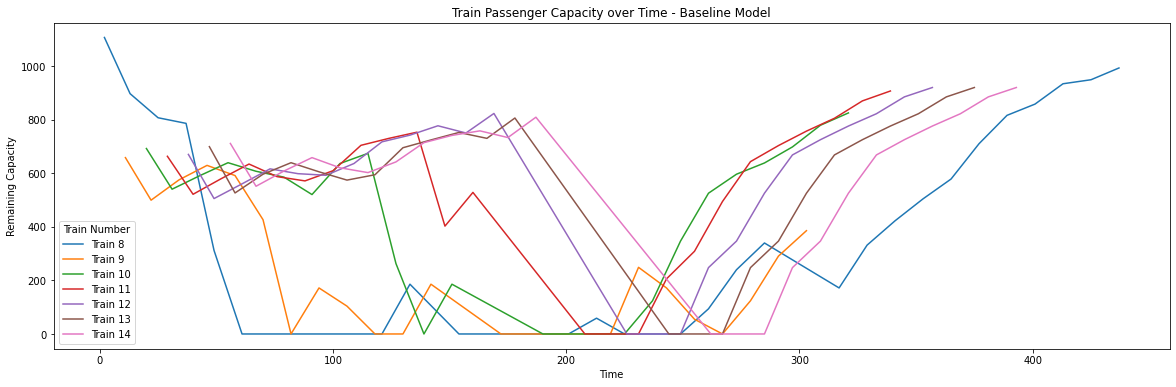

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
sns.lineplot(data = northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'], x = 'Time', y = 'Remaining Capacity', hue = 'Train Number')
plt.title('Train Passenger Capacity over Time - Baseline Model')

In [15]:
capacity_df = pd.DataFrame({'Station Name': [], 'Mean Remaining Capacity': []})


for i in northbound_trains:
    
    
    print("The average remaining capacity of passengers at {} is {}".format(i.current_station, np.nanmean(i.remaining_capacity)))
    
    capacity_df = waitingtime_df.append({'Station Name': i.current_station, 'Mean Remaining Capacity': round(np.nanmean(i.remaining_capacity), ndigits = 0)}, ignore_index = True)
 
    
for i in southbound_trains:
    
    print("The average remaining capacity of passengers at {} is {}".format(i.current_station, np.nanmean(i.remaining_capacity)))
    

    capacity_df = waitingtime_df.append({'Station Name': i.current_station, 'Mean Remaining Capacity': round(np.nanmean(i.remaining_capacity), ndigits = 0)}, ignore_index = True)




capacity_df


The average remaining capacity of passengers at Taft - Southbound is 1240.0
The average remaining capacity of passengers at Taft - Southbound is 1240.0
The average remaining capacity of passengers at Taft - Southbound is 1240.0
The average remaining capacity of passengers at Taft - Southbound is 1240.0
The average remaining capacity of passengers at Taft - Southbound is 1240.0
The average remaining capacity of passengers at Taft - Southbound is 1240.0
The average remaining capacity of passengers at Taft - Southbound is 1240.0
The average remaining capacity of passengers at North Edsa - Northbound is 1240.0
The average remaining capacity of passengers at North Edsa - Northbound is 1240.0
The average remaining capacity of passengers at North Edsa - Northbound is 1240.0
The average remaining capacity of passengers at North Edsa - Northbound is 1240.0
The average remaining capacity of passengers at North Edsa - Northbound is 1240.0
The average remaining capacity of passengers at North Edsa

,Station Name,Mean Waiting Time,Mean Remaining Capacity
0,Taft - Northbound,49.0,NaN
1,Magallanes - Northbound,95.0,NaN
2,Ayala Ave - Northbound,37.0,NaN
3,Buendia - Northbound,36.0,NaN
4,Guadalupe - Northbound,55.0,NaN
5,Boni - Northbound,53.0,NaN
6,Shaw Blvd - Northbound,42.0,NaN
7,Ortigas - Northbound,37.0,NaN
8,Santolan - Northbound,40.0,NaN
9,Cubao - Northbound,44.0,NaN


In [ ]:
plt.figure(figsize = (5, 10))
sns.barplot(data = )

In [9]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#### Look at logs ot Train activity

In [47]:
print(northbound_trains[2].logdf)

    Train Number  Time                      Station                 Action  \
0       Train 10     0  Starting Point (No Station)         Starting Train   
1       Train 10    20            Taft - Northbound   Onboarded passengers   
2       Train 10    29            Taft - Northbound           Left station   
3       Train 10    30      Magallanes - Northbound  Offboarded passengers   
4       Train 10    32      Magallanes - Northbound   Onboarded passengers   
5       Train 10    41      Magallanes - Northbound           Left station   
6       Train 10    42       Ayala Ave - Northbound  Offboarded passengers   
7       Train 10    44       Ayala Ave - Northbound   Onboarded passengers   
8       Train 10    53       Ayala Ave - Northbound           Left station   
9       Train 10    54         Buendia - Northbound  Offboarded passengers   
10      Train 10    56         Buendia - Northbound   Onboarded passengers   
11      Train 10    65         Buendia - Northbound           Le

<AxesSubplot:xlabel='Time', ylabel='Remaining Capacity'>

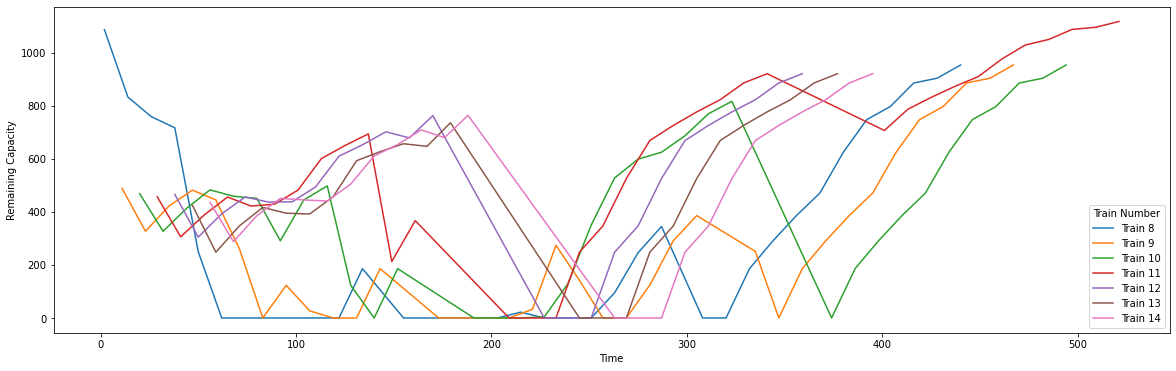

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
sns.lineplot(data = northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'], x = 'Time', y = 'Remaining Capacity', hue = 'Train Number')

### Simulation 1: Increasing Number of Trains

#### Travel Rate: 9 minutes
#### Number of trains: 24 (12 each direction)
#### Station Skipping: None

In [54]:
#SETTING UP THE TRAINS

import numpy as np

southbound_trains = [Train(capacity = 1240, train_name = "Train {}".format(i+1), travel_rate = 9) for i in np.arange(0, 12)]
northbound_trains = [Train(capacity = 1240, train_name = "Train {}".format(i+8), travel_rate = 9) for i in np.arange(0,12)]

In [55]:
#Southbound stations
north_edsa_s = Station(station_name = 'North Edsa - Southbound', rate_arrival = 88, rate_offboarding = 0)
qave_s = Station(station_name = 'Quezon Ave - Southbound', rate_arrival  = 20, rate_offboarding = 0)
kamuning_s = Station(station_name = 'GMA Kamuning - Soutbound', rate_arrival  = 11/2, rate_offboarding = 0.05)
cubao_s = Station(station_name = 'Cubao - Southbound', rate_arrival  = 17/2, rate_offboarding = 0.2)
santolan_s = Station(station_name = 'Santolan - Southbound', rate_arrival  = 6/2, rate_offboarding = 0.1)
ortigas_s = Station(station_name = 'Ortigas - Southbound', rate_arrival  = 7/2, rate_offboarding = 0.2)
shaw_s = Station(station_name = 'Shaw Blvd - Southbound', rate_arrival  = 22/2, rate_offboarding = 0.2)
boni_s = Station(station_name = 'Boni - Southbound', rate_arrival  =   18/2, rate_offboarding = 0.1)
guadalupe_s = Station(station_name = 'Guadalupe - Soutbound', rate_arrival  = 22/2, rate_offboarding = 0.1)
buendia_s = Station(station_name = 'Buendia - Southbound', rate_arrival  = 4/2, rate_offboarding = 0.1)
ayala_s = Station(station_name = 'Ayala Ave - Southbound', rate_arrival  = 11/2, rate_offboarding = 0.15)
magallanes_s = Station(station_name = 'Magallanes - Southbound', rate_arrival  = 0, rate_offboarding = 0.1)
taft_s = Station(station_name = 'Taft - Southbound', rate_arrival  = 0, rate_offboarding = 1)



southbound_stations = [north_edsa_s, 
                       qave_s, 
                       kamuning_s, 
                       cubao_s, 
                       santolan_s, 
                       ortigas_s, 
                       shaw_s, 
                       boni_s, 
                       guadalupe_s, 
                       buendia_s, 
                       ayala_s, 
                       magallanes_s, 
                       taft_s]


for i in southbound_stations:
    
    i.arrivals(time_limit = 180)
    
    
#Northbound stations at the other end of the line    
north_edsa_n = Station(station_name = 'North Edsa - Northbound', rate_arrival = 0, rate_offboarding = 1)
qave_n = Station(station_name = 'Quezon Ave - Northbound', rate_arrival  = 0, rate_offboarding = 0.15)
kamuning_n = Station(station_name = 'GMA Kamuning - Northbound', rate_arrival  = 11/2, rate_offboarding = 0.05)
cubao_n = Station(station_name = 'Cubao - Northbound', rate_arrival  = 17/2, rate_offboarding = 0.2)
santolan_n = Station(station_name = 'Santolan - Northbound', rate_arrival  = 6/2, rate_offboarding = 0.1)
ortigas_n = Station(station_name = 'Ortigas - Northbound', rate_arrival  = 7/2, rate_offboarding = 0.2)
shaw_n = Station(station_name = 'Shaw Blvd - Northbound', rate_arrival  = 22/2, rate_offboarding = 0.2)
boni_n = Station(station_name = 'Boni - Northbound', rate_arrival  =   18/2, rate_offboarding = 0.1)
guadalupe_n = Station(station_name = 'Guadalupe - Northbound', rate_arrival  = 22/2, rate_offboarding = 0.1)
buendia_n = Station(station_name = 'Buendia - Northbound', rate_arrival  = 4/2, rate_offboarding = 0.1)
ayala_n = Station(station_name = 'Ayala Ave - Northbound', rate_arrival  = 11/2, rate_offboarding = 0.15)
magallanes_n = Station(station_name = 'Magallanes - Northbound', rate_arrival  = 18, rate_offboarding = 0)
taft_n = Station(station_name = 'Taft - Northbound', rate_arrival  = 63, rate_offboarding = 0)


northbound_stations = [taft_n,
                      magallanes_n,
                      ayala_n,
                      buendia_n,
                      guadalupe_n,
                      boni_n,
                      shaw_n,
                      ortigas_n,
                      santolan_n,
                      cubao_n,
                      kamuning_n,
                      qave_n,
                      north_edsa_n]


for i in northbound_stations:
    
    i.arrivals(time_limit = 180)



In [56]:
#Initializing passengers during whole simulation

passengers_left = 0

for i in northbound_stations:
    passengers_left = passengers_left + len(i.arrival_times)
    
for i in southbound_stations:
    
    passengers_left = passengers_left + len(i.arrival_times)
    
print("These are total passengers throughout the simulation: {}".format(passengers_left))


These are total passengers throughout the simulation: 55024


In [57]:
#time_buffer_n = 0
#time_buffer_s = 0

while passengers_left > 0:

    time_buffer_s = 0
    print("############\n\nNOW, WE WILL LOOK AT SOUTHBOUND  TRAINS \n\n ###############")
    for j in southbound_trains:
        
        
        
        j.time = j.time + time_buffer_s
    

        for i in southbound_stations: #Southbound trains originating from north travel on southbound line
            
            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_s = time_buffer_s + j.travel_rate

    time_buffer_n = 0
    print("############\n\nNOW, WE WILL LOOK AT NORTHBOUND  TRAINS \n\n ###############")
    for j in northbound_trains:
        
        j.time = j.time + time_buffer_n

        for i in northbound_stations:
            
            

            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_n = time_buffer_n + j.travel_rate
    
    time_buffer_s = 0
    print("############\n\nNOW, WE WILL LOOK AT SOUTHBOUND  TRAINS \n\n ###############")

    for j in southbound_trains:
        
        j.time = j.time + time_buffer_s

        for i in northbound_stations:

            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t))) 
        time_buffer_s = time_buffer_s + j.travel_rate

    time_buffer_n = 0
    print("############\n\nNOW, WE WILL LOOK AT NORTHBOUND  TRAINS \n\n ###############")
    for j in northbound_trains:
        
        j.time = j.time + time_buffer_n

        for i in southbound_stations:


            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_n = time_buffer_n + j.travel_rate

    #Check passengers_left

    passengers_left = 0

    for i in northbound_stations:
        passengers_left = passengers_left + len(i.arrival_times)

    for i in southbound_stations:

        passengers_left = passengers_left + len(i.arrival_times)
        
        
        

print("There are {} passengers left".format(passengers_left))


############

NOW, WE WILL LOOK AT SOUTHBOUND  TRAINS 

 ###############
This is the current time: 0.


Train 1 has arrived at North Edsa - Southbound. 

This is the time at station: 0.
This is the time at station: 0.
This is the current time: 0.


Train cannot onboard anymore passengers.
Current passenger count is 200
No passengers have arrived yet.
Next arrival is 2.0078952965575416 and current time is 2
200 passengers have boarded Train 1.

200 passengers are onboard.


This is the time at station: 2.
This is the current time: 2.


Train 1 has left the station.
This is the time at station: 11.
This is the current time: 11.


This is the current time: 11.


Train 1 has arrived at Quezon Ave - Southbound. 

This is the time at station: 11.
This is the time at station: 11.
This is the current time: 11.


Train cannot onboard anymore passengers.
Current passenger count is 469
No passengers have arrived yet.
Next arrival is 13.002852117813218 and current time is 13
269 passengers have bo

In [59]:
waitingtime_df = pd.DataFrame({'Station Name': [], 'Mean Waiting Time': []})
waitingtime_tot = pd.DataFrame({'Station Name': [], 'Mean Waiting Time': []})

for i in northbound_stations:
    
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    
    waitingtime_df = waitingtime_df.append({'Station Name': i.station_name, 'Mean Waiting Time': round(np.mean(i.waiting_times), ndigits = 0)}, ignore_index = True)
    waitingtime_tot = waitingtime_tot.append(i.waiting_times)
    
    
for i in southbound_stations:
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    

    waitingtime_df = waitingtime_df.append({'Station Name': i.station_name, 'Mean Waiting Time': round(np.mean(i.waiting_times), ndigits = 0)}, ignore_index = True)
    waitingtime_tot = waitingtime_tot.append(i.waiting_times)
        
waitingtime_df


print('This is the average waiting time {}.'.format(np.nanmean(waitingtime_tot)))
print('This is the median waiting time {}.'.format(np.nanmedian(waitingtime_tot)))






waitingtime_df

The average waiting time of passengers at Taft - Northbound is 18.873225532754844
The average waiting time of passengers at Magallanes - Northbound is 45.01598009604479
The average waiting time of passengers at Ayala Ave - Northbound is 13.849255376825242
The average waiting time of passengers at Buendia - Northbound is 13.668120797703981
The average waiting time of passengers at Guadalupe - Northbound is 18.91477259134223
The average waiting time of passengers at Boni - Northbound is 18.67590684320976
The average waiting time of passengers at Shaw Blvd - Northbound is 23.34430424160561
The average waiting time of passengers at Ortigas - Northbound is 20.542340499009
The average waiting time of passengers at Santolan - Northbound is 31.49399917943358
The average waiting time of passengers at Cubao - Northbound is 38.731079936811994
The average waiting time of passengers at GMA Kamuning - Northbound is 53.01743448957189
The average waiting time of passengers at Quezon Ave - Northbound i

,Station Name,Mean Waiting Time
0,Taft - Northbound,19.0
1,Magallanes - Northbound,45.0
2,Ayala Ave - Northbound,14.0
3,Buendia - Northbound,14.0
4,Guadalupe - Northbound,19.0
5,Boni - Northbound,19.0
6,Shaw Blvd - Northbound,23.0
7,Ortigas - Northbound,21.0
8,Santolan - Northbound,31.0
9,Cubao - Northbound,39.0


In [54]:
import pandas as pd


northbound_dataframe = pd.DataFrame([])
southbound_dataframe = pd.DataFrame([])

for i in northbound_trains:
    
    northbound_dataframe = northbound_dataframe.append(i.logdf, ignore_index = True)
    
for i in southbound_trains:
    
    southbound_dataframe = southbound_dataframe.append(i.logdf, ignore_index = True)
    
    

northbound_dataframe = northbound_dataframe.loc[(northbound_dataframe['Passengers Onboard'] > 0) & (northbound_dataframe['Station'] != 'Starting Point (No Station)')]


southbound_dataframe = southbound_dataframe.loc[(southbound_dataframe['Passengers Onboard'] > 0) & (southbound_dataframe['Station'] != 'Starting Point (No Station)')]


<AxesSubplot:xlabel='Time', ylabel='Remaining Capacity'>

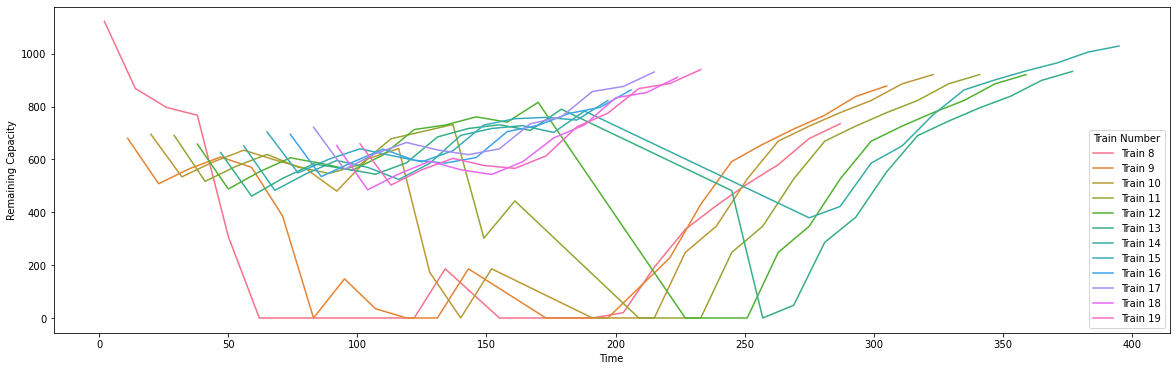

In [55]:
import seaborn as sns

plt.figure(figsize=(20,6))
sns.lineplot(data = northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'], x = 'Time', y = 'Remaining Capacity', hue = 'Train Number')

### Simulation 2: Train Speed Increased

#### Travel Rate: 5 minutes
#### Number of Trains: 14 (7 each direction)
#### Station Skipping: None

In [60]:
#SETTING UP THE TRAINS
num_trains = 7
import numpy as np

southbound_trains = [Train(capacity = 1240, train_name = "Train {}".format(i+1), travel_rate = 5) for i in np.arange(0, num_trains)]
northbound_trains = [Train(capacity = 1240, train_name = "Train {}".format(i+8), travel_rate = 5) for i in np.arange(0,num_trains)]

In [61]:
#Southbound stations
north_edsa_s = Station(station_name = 'North Edsa - Southbound', rate_arrival = 88, rate_offboarding = 0)
qave_s = Station(station_name = 'Quezon Ave - Southbound', rate_arrival  = 20, rate_offboarding = 0)
kamuning_s = Station(station_name = 'GMA Kamuning - Soutbound', rate_arrival  = 11/2, rate_offboarding = 0.05)
cubao_s = Station(station_name = 'Cubao - Southbound', rate_arrival  = 17/2, rate_offboarding = 0.2)
santolan_s = Station(station_name = 'Santolan - Southbound', rate_arrival  = 6/2, rate_offboarding = 0.1)
ortigas_s = Station(station_name = 'Ortigas - Southbound', rate_arrival  = 7/2, rate_offboarding = 0.2)
shaw_s = Station(station_name = 'Shaw Blvd - Southbound', rate_arrival  = 22/2, rate_offboarding = 0.2)
boni_s = Station(station_name = 'Boni - Southbound', rate_arrival  =   18/2, rate_offboarding = 0.1)
guadalupe_s = Station(station_name = 'Guadalupe - Soutbound', rate_arrival  = 22/2, rate_offboarding = 0.1)
buendia_s = Station(station_name = 'Buendia - Southbound', rate_arrival  = 4/2, rate_offboarding = 0.1)
ayala_s = Station(station_name = 'Ayala Ave - Southbound', rate_arrival  = 11/2, rate_offboarding = 0.15)
magallanes_s = Station(station_name = 'Magallanes - Southbound', rate_arrival  = 0, rate_offboarding = 0.1)
taft_s = Station(station_name = 'Taft - Southbound', rate_arrival  = 0, rate_offboarding = 1)



southbound_stations = [north_edsa_s, 
                       qave_s, 
                       kamuning_s, 
                       cubao_s, 
                       santolan_s, 
                       ortigas_s, 
                       shaw_s, 
                       boni_s, 
                       guadalupe_s, 
                       buendia_s, 
                       ayala_s, 
                       magallanes_s, 
                       taft_s]


for i in southbound_stations:
    
    i.arrivals(time_limit = 180)
    
    
#Northbound stations at the other end of the line    
north_edsa_n = Station(station_name = 'North Edsa - Northbound', rate_arrival = 0, rate_offboarding = 1)
qave_n = Station(station_name = 'Quezon Ave - Northbound', rate_arrival  = 0, rate_offboarding = 0.15)
kamuning_n = Station(station_name = 'GMA Kamuning - Northbound', rate_arrival  = 11/2, rate_offboarding = 0.05)
cubao_n = Station(station_name = 'Cubao - Northbound', rate_arrival  = 17/2, rate_offboarding = 0.2)
santolan_n = Station(station_name = 'Santolan - Northbound', rate_arrival  = 6/2, rate_offboarding = 0.1)
ortigas_n = Station(station_name = 'Ortigas - Northbound', rate_arrival  = 7/2, rate_offboarding = 0.2)
shaw_n = Station(station_name = 'Shaw Blvd - Northbound', rate_arrival  = 22/2, rate_offboarding = 0.2)
boni_n = Station(station_name = 'Boni - Northbound', rate_arrival  =   18/2, rate_offboarding = 0.1)
guadalupe_n = Station(station_name = 'Guadalupe - Northbound', rate_arrival  = 22/2, rate_offboarding = 0.1)
buendia_n = Station(station_name = 'Buendia - Northbound', rate_arrival  = 4/2, rate_offboarding = 0.1)
ayala_n = Station(station_name = 'Ayala Ave - Northbound', rate_arrival  = 11/2, rate_offboarding = 0.15)
magallanes_n = Station(station_name = 'Magallanes - Northbound', rate_arrival  = 18, rate_offboarding = 0)
taft_n = Station(station_name = 'Taft - Northbound', rate_arrival  = 63, rate_offboarding = 0)


northbound_stations = [taft_n,
                      magallanes_n,
                      ayala_n,
                      buendia_n,
                      guadalupe_n,
                      boni_n,
                      shaw_n,
                      ortigas_n,
                      santolan_n,
                      cubao_n,
                      kamuning_n,
                      qave_n,
                      north_edsa_n]


for i in northbound_stations:
    
    i.arrivals(time_limit = 180)



In [62]:
#Initializing passengers during whole simulation

passengers_left = 0

for i in northbound_stations:
    passengers_left = passengers_left + len(i.arrival_times)
    
for i in southbound_stations:
    
    passengers_left = passengers_left + len(i.arrival_times)
    
print("These are total passengers throughout the simulation: {}".format(passengers_left))


These are total passengers throughout the simulation: 55312


In [63]:
#time_buffer_n = 0
#time_buffer_s = 0

while passengers_left > 0:

    time_buffer_s = 0
    print("############\n\nNOW, WE WILL LOOK AT SOUTHBOUND  TRAINS \n\n ###############")
    for j in southbound_trains:
        
        
        
        j.time = j.time + time_buffer_s
    

        for i in southbound_stations: #Southbound trains originating from north travel on southbound line
            
            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_s = time_buffer_s + j.travel_rate

    time_buffer_n = 0
    print("############\n\nNOW, WE WILL LOOK AT NORTHBOUND  TRAINS \n\n ###############")
    for j in northbound_trains:
        
        j.time = j.time + time_buffer_n

        for i in northbound_stations:
            
            

            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_n = time_buffer_n + j.travel_rate
    
    time_buffer_s = 0
    print("############\n\nNOW, WE WILL LOOK AT SOUTHBOUND  TRAINS \n\n ###############")

    for j in southbound_trains:
        
        j.time = j.time + time_buffer_s

        for i in northbound_stations:

            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t))) 
        time_buffer_s = time_buffer_s + j.travel_rate

    time_buffer_n = 0
    print("############\n\nNOW, WE WILL LOOK AT NORTHBOUND  TRAINS \n\n ###############")
    for j in northbound_trains:
        
        j.time = j.time + time_buffer_n

        for i in southbound_stations:


            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                i.waiting_time(train = j)
                j.onboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_n = time_buffer_n + j.travel_rate

    #Check passengers_left

    passengers_left = 0

    for i in northbound_stations:
        passengers_left = passengers_left + len(i.arrival_times)

    for i in southbound_stations:

        passengers_left = passengers_left + len(i.arrival_times)
        
        
        

print("There are {} passengers left".format(passengers_left))


############

NOW, WE WILL LOOK AT SOUTHBOUND  TRAINS 

 ###############
This is the current time: 0.


Train 1 has arrived at North Edsa - Southbound. 

This is the time at station: 0.
This is the time at station: 0.
This is the current time: 0.


Train cannot onboard anymore passengers.
Current passenger count is 198
No passengers have arrived yet.
Next arrival is 2.0288521260888137 and current time is 2
198 passengers have boarded Train 1.

198 passengers are onboard.


This is the time at station: 2.
This is the current time: 2.


Train 1 has left the station.
This is the time at station: 7.
This is the current time: 7.


This is the current time: 7.


Train 1 has arrived at Quezon Ave - Southbound. 

This is the time at station: 7.
This is the time at station: 7.
This is the current time: 7.


Train cannot onboard anymore passengers.
Current passenger count is 375
No passengers have arrived yet.
Next arrival is 9.072459349989341 and current time is 9
177 passengers have boarded Tr

In [64]:
waitingtime_df = pd.DataFrame({'Station Name': [], 'Mean Waiting Time': []})
waitingtime_tot = pd.DataFrame({'Station Name': [], 'Mean Waiting Time': []})

for i in northbound_stations:
    
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    
    waitingtime_df = waitingtime_df.append({'Station Name': i.station_name, 'Mean Waiting Time': round(np.mean(i.waiting_times), ndigits = 0)}, ignore_index = True)
    waitingtime_tot = waitingtime_tot.append(i.waiting_times)
    
    
for i in southbound_stations:
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    

    waitingtime_df = waitingtime_df.append({'Station Name': i.station_name, 'Mean Waiting Time': round(np.mean(i.waiting_times), ndigits = 0)}, ignore_index = True)
    waitingtime_tot = waitingtime_tot.append(i.waiting_times)
        
waitingtime_df


print('This is the average waiting time {}.'.format(np.nanmean(waitingtime_tot)))
print('This is the median waiting time {}.'.format(np.nanmedian(waitingtime_tot)))






waitingtime_df

The average waiting time of passengers at Taft - Northbound is 23.077019574516367
The average waiting time of passengers at Magallanes - Northbound is 58.687429648578814
The average waiting time of passengers at Ayala Ave - Northbound is 20.758858424128245
The average waiting time of passengers at Buendia - Northbound is 18.307998608404905
The average waiting time of passengers at Guadalupe - Northbound is 24.1926601854519
The average waiting time of passengers at Boni - Northbound is 26.530086082196647
The average waiting time of passengers at Shaw Blvd - Northbound is 23.4536248944277
The average waiting time of passengers at Ortigas - Northbound is 23.5428835271716
The average waiting time of passengers at Santolan - Northbound is 25.53159968572726
The average waiting time of passengers at Cubao - Northbound is 28.678568329011703
The average waiting time of passengers at GMA Kamuning - Northbound is 35.70777490543725
The average waiting time of passengers at Quezon Ave - Northbound 

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Station Name,Mean Waiting Time
0,Taft - Northbound,23.0
1,Magallanes - Northbound,59.0
2,Ayala Ave - Northbound,21.0
3,Buendia - Northbound,18.0
4,Guadalupe - Northbound,24.0
5,Boni - Northbound,27.0
6,Shaw Blvd - Northbound,23.0
7,Ortigas - Northbound,24.0
8,Santolan - Northbound,26.0
9,Cubao - Northbound,29.0


In [11]:
import pandas as pd


northbound_dataframe = pd.DataFrame([])
southbound_dataframe = pd.DataFrame([])

for i in northbound_trains:
    
    northbound_dataframe = northbound_dataframe.append(i.logdf, ignore_index = True)
    
for i in southbound_trains:
    
    southbound_dataframe = southbound_dataframe.append(i.logdf, ignore_index = True)
    
    

northbound_dataframe = northbound_dataframe.loc[(northbound_dataframe['Passengers Onboard'] > 0) & (northbound_dataframe['Station'] != 'Starting Point (No Station)')]


southbound_dataframe = southbound_dataframe.loc[(southbound_dataframe['Passengers Onboard'] > 0) & (southbound_dataframe['Station'] != 'Starting Point (No Station)')]

    

In [12]:
northbound_dataframe

,Train Number,Time,Station,Action,Passengers Onboard,Remaining Capacity
1,Train 8,2,Taft - Northbound,Onboarded passengers,153,1087
2,Train 8,11,Taft - Northbound,Left station,153,1087
3,Train 8,12,Magallanes - Northbound,Offboarded passengers,153,1087
4,Train 8,14,Magallanes - Northbound,Onboarded passengers,407,833
5,Train 8,23,Magallanes - Northbound,Left station,407,833
6,Train 8,24,Ayala Ave - Northbound,Offboarded passengers,346,894
7,Train 8,26,Ayala Ave - Northbound,Onboarded passengers,481,759
8,Train 8,35,Ayala Ave - Northbound,Left station,481,759
9,Train 8,36,Buendia - Northbound,Offboarded passengers,433,807
10,Train 8,38,Buendia - Northbound,Onboarded passengers,523,717


It takes around <b>6 hours</b> for all passengers who arrived within 3 hours to reach their destinations.

<AxesSubplot:xlabel='Time', ylabel='Remaining Capacity'>

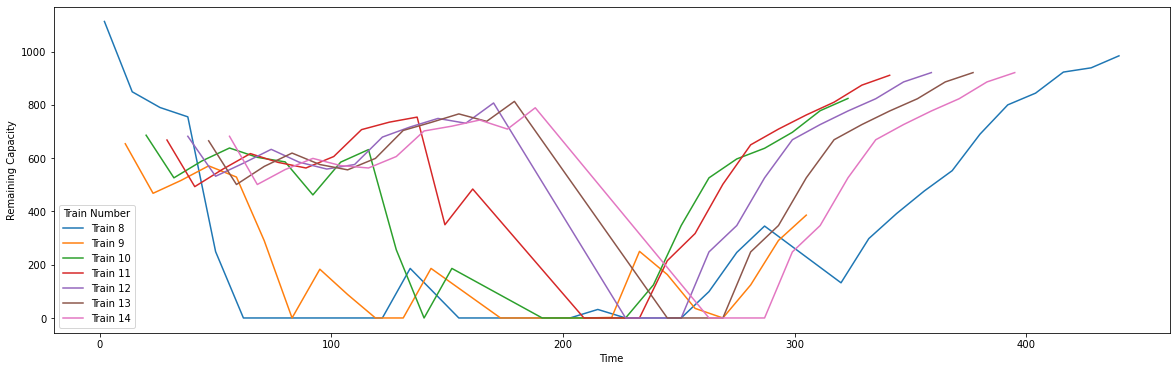

In [378]:
import seaborn as sns

plt.figure(figsize=(20,6))
sns.lineplot(data = northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'], x = 'Time', y = 'Remaining Capacity', hue = 'Train Number')

In [379]:
northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'].groupby(by = 'Station').mean()

,Time,Passengers Onboard,Remaining Capacity
Station,,,
Ayala Ave - Northbound,87.875,682.750000,557.250000
Ayala Ave - Southbound,329.000,547.571429,692.428571
Boni - Northbound,123.875,781.250000,458.750000
Boni - Southbound,293.000,737.142857,502.857143
Buendia - Northbound,99.875,637.000000,603.000000
Buendia - Southbound,317.000,640.142857,599.857143
Cubao - Northbound,171.875,716.125000,523.875000
Cubao - Southbound,245.000,1103.000000,137.000000
GMA Kamuning - Northbound,183.875,806.625000,433.375000


In [13]:
northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'].groupby(by = 'Station').mean()

,Time,Passengers Onboard,Remaining Capacity
Station,,,
Ayala Ave - Northbound,169.181818,835.181818,404.818182
Ayala Ave - Southbound,329.000000,547.000000,693.000000
Boni - Northbound,205.181818,809.454545,430.545455
Boni - Southbound,293.000000,739.571429,500.428571
Buendia - Northbound,181.181818,770.272727,469.727273
Buendia - Southbound,317.000000,640.285714,599.714286
Cubao - Northbound,253.181818,637.181818,602.818182
Cubao - Southbound,245.000000,1097.714286,142.285714
GMA Kamuning - Northbound,265.181818,692.090909,547.909091


In [14]:
southbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'].groupby(by = 'Station').mean()

,Time,Passengers Onboard,Remaining Capacity
Station,,,
Ayala Ave - Northbound,233.000000,1136.428571,103.571429
Ayala Ave - Southbound,265.181818,722.545455,517.454545
Boni - Northbound,269.000000,1036.285714,203.714286
Boni - Southbound,229.181818,713.000000,527.000000
Buendia - Northbound,245.000000,1045.428571,194.571429
Buendia - Southbound,253.181818,747.909091,492.090909
Cubao - Northbound,317.000000,564.142857,675.857143
Cubao - Southbound,181.181818,846.090909,393.909091
GMA Kamuning - Northbound,329.000000,539.428571,700.571429


In [364]:
northbound_dataframe.loc[northbound_dataframe['Station'] == 'Ayala Ave - Northbound']

,Train Number,Time,Station,Action,Passengers Onboard,Remaining Capacity
6,Train 8,16,Ayala Ave - Northbound,Offboarded passengers,270,970
7,Train 8,18,Ayala Ave - Northbound,Onboarded passengers,376,864
8,Train 8,23,Ayala Ave - Northbound,Left station,376,864
80,Train 8,218,Ayala Ave - Northbound,Offboarded passengers,1054,186
81,Train 8,220,Ayala Ave - Northbound,Onboarded passengers,1054,186
82,Train 8,225,Ayala Ave - Northbound,Left station,1054,186
155,Train 9,21,Ayala Ave - Northbound,Offboarded passengers,320,920
156,Train 9,23,Ayala Ave - Northbound,Onboarded passengers,348,892
157,Train 9,28,Ayala Ave - Northbound,Left station,348,892
229,Train 9,233,Ayala Ave - Northbound,Offboarded passengers,1054,186


In [367]:
northbound_dataframe.loc[northbound_dataframe['Station'] == 'Taft - Northbound']

,Train Number,Time,Station,Action,Passengers Onboard,Remaining Capacity
1,Train 8,2,Taft - Northbound,Onboarded passengers,133,1107
2,Train 8,7,Taft - Northbound,Left station,133,1107
75,Train 8,204,Taft - Northbound,Onboarded passengers,1079,161
76,Train 8,209,Taft - Northbound,Left station,1079,161
150,Train 9,7,Taft - Northbound,Onboarded passengers,280,960
151,Train 9,12,Taft - Northbound,Left station,280,960
299,Train 10,12,Taft - Northbound,Onboarded passengers,283,957
300,Train 10,17,Taft - Northbound,Left station,283,957
448,Train 11,17,Taft - Northbound,Onboarded passengers,309,931
449,Train 11,22,Taft - Northbound,Left station,309,931


In [382]:
southbound_dataframe.loc[southbound_dataframe['Action'] == 'Onboarded passengers'].groupby(by = 'Station').mean()

,Time,Passengers Onboard,Remaining Capacity
Station,,,
Ayala Ave - Northbound,233.000000,1139.142857,100.857143
Ayala Ave - Southbound,265.181818,713.818182,526.181818
Boni - Northbound,269.000000,1044.428571,195.571429
Boni - Southbound,229.181818,705.545455,534.454545
Buendia - Northbound,245.000000,1053.142857,186.857143
Buendia - Southbound,253.181818,738.000000,502.000000
Cubao - Northbound,317.000000,569.285714,670.714286
Cubao - Southbound,181.181818,842.181818,397.818182
GMA Kamuning - Northbound,329.000000,544.142857,695.857143


In [381]:
northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'].groupby(by = 'Station').mean()

,Time,Passengers Onboard,Remaining Capacity
Station,,,
Ayala Ave - Northbound,87.875,682.750000,557.250000
Ayala Ave - Southbound,329.000,547.571429,692.428571
Boni - Northbound,123.875,781.250000,458.750000
Boni - Southbound,293.000,737.142857,502.857143
Buendia - Northbound,99.875,637.000000,603.000000
Buendia - Southbound,317.000,640.142857,599.857143
Cubao - Northbound,171.875,716.125000,523.875000
Cubao - Southbound,245.000,1103.000000,137.000000
GMA Kamuning - Northbound,183.875,806.625000,433.375000


In [354]:
northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers']

,Train Number,Time,Station,Action,Passengers Onboard,Remaining Capacity
1,Train 8,2,Taft - Northbound,Onboarded passengers,133,1107
4,Train 8,10,Magallanes - Northbound,Onboarded passengers,318,922
7,Train 8,18,Ayala Ave - Northbound,Onboarded passengers,376,864
10,Train 8,26,Buendia - Northbound,Onboarded passengers,385,855
13,Train 8,34,Guadalupe - Northbound,Onboarded passengers,724,516
16,Train 8,42,Boni - Northbound,Onboarded passengers,1040,200
19,Train 8,50,Shaw Blvd - Northbound,Onboarded passengers,1240,0
22,Train 8,58,Ortigas - Northbound,Onboarded passengers,1183,57
25,Train 8,66,Santolan - Northbound,Onboarded passengers,1240,0
28,Train 8,74,Cubao - Northbound,Onboarded passengers,1240,0


In [380]:
southbound_dataframe.loc[southbound_dataframe['Action'] == 'Onboarded passengers']

,Train Number,Time,Station,Action,Passengers Onboard,Remaining Capacity
1,Train 1,2,North Edsa - Southbound,Onboarded passengers,178,1062
4,Train 1,14,Quezon Ave - Southbound,Onboarded passengers,456,784
7,Train 1,26,GMA Kamuning - Soutbound,Onboarded passengers,574,666
10,Train 1,38,Cubao - Southbound,Onboarded passengers,768,472
13,Train 1,50,Santolan - Southbound,Onboarded passengers,839,401
16,Train 1,62,Ortigas - Southbound,Onboarded passengers,883,357
19,Train 1,74,Shaw Blvd - Southbound,Onboarded passengers,1240,0
22,Train 1,86,Boni - Southbound,Onboarded passengers,1240,0
25,Train 1,98,Guadalupe - Soutbound,Onboarded passengers,1240,0
28,Train 1,110,Buendia - Southbound,Onboarded passengers,1240,0


In [ ]:
import seaborn as sns

plt.figure(figsize=(20,6))
sns.barplot(data = northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'], x = 'Time', y = 'Remaining Capacity', hue = 'Train Number')

In [104]:
for i in northbound_stations:
    
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    
for i in southbound_stations:
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))

The average waiting time of passengers at Taft - Northbound is 18.594632873209218
The average waiting time of passengers at Magallanes - Northbound is 32.413745992268275
The average waiting time of passengers at Ayala Ave - Northbound is 16.899330266762114
The average waiting time of passengers at Buendia - Northbound is 15.900625096613734
The average waiting time of passengers at Guadalupe - Northbound is 21.25009294953384
The average waiting time of passengers at Boni - Northbound is 20.316848736417903
The average waiting time of passengers at Shaw Blvd - Northbound is 17.803231413445726
The average waiting time of passengers at Ortigas - Northbound is 16.66927280298744
The average waiting time of passengers at Santolan - Northbound is 16.06681227836766
The average waiting time of passengers at Cubao - Northbound is 17.763989347209623
The average waiting time of passengers at GMA Kamuning - Northbound is 20.362276744639743
The average waiting time of passengers at Quezon Ave - Northb

In [15]:
for i in northbound_stations:
    
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    
for i in southbound_stations:
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))

The average waiting time of passengers at Taft - Northbound is 65.17758730820994
The average waiting time of passengers at Magallanes - Northbound is 129.11489712495595
The average waiting time of passengers at Ayala Ave - Northbound is 40.145063937012054
The average waiting time of passengers at Buendia - Northbound is 30.89842092071793
The average waiting time of passengers at Guadalupe - Northbound is 52.552956527670126
The average waiting time of passengers at Boni - Northbound is 54.616566612882096
The average waiting time of passengers at Shaw Blvd - Northbound is 41.769868374162435
The average waiting time of passengers at Ortigas - Northbound is 36.93098033616488
The average waiting time of passengers at Santolan - Northbound is 43.87239087870884
The average waiting time of passengers at Cubao - Northbound is 42.074729964782435
The average waiting time of passengers at GMA Kamuning - Northbound is 53.479519911541765
The average waiting time of passengers at Quezon Ave - Northbo

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Scenario 3: Alternate Skipping of First 2 Stations

#### Travel Rate: 9 minutes
#### Number of Trains: 14 (7 each direction)
#### Station Skipping: Yes. Either North Edsa or Quezon Avenue are skipped Southbound, and Taft or Magallanes are skipped Northbound.

In [65]:
#SETTING UP THE TRAINS

import numpy as np

southbound_trains = [Train(capacity = 1240, train_name = "Train {}".format(i+1), travel_rate = 9) for i in np.arange(0, 7)]
northbound_trains = [Train(capacity = 1240, train_name = "Train {}".format(i+8), travel_rate = 9) for i in np.arange(0,7)]

In [66]:
#Southbound stations
north_edsa_s = Station(station_name = 'North Edsa - Southbound', rate_arrival = 88, rate_offboarding = 0)
qave_s = Station(station_name = 'Quezon Ave - Southbound', rate_arrival  = 20, rate_offboarding = 0)
kamuning_s = Station(station_name = 'GMA Kamuning - Soutbound', rate_arrival  = 11/2, rate_offboarding = 0.05)
cubao_s = Station(station_name = 'Cubao - Southbound', rate_arrival  = 17/2, rate_offboarding = 0.2)
santolan_s = Station(station_name = 'Santolan - Southbound', rate_arrival  = 6/2, rate_offboarding = 0.1)
ortigas_s = Station(station_name = 'Ortigas - Southbound', rate_arrival  = 7/2, rate_offboarding = 0.2)
shaw_s = Station(station_name = 'Shaw Blvd - Southbound', rate_arrival  = 22/2, rate_offboarding = 0.2)
boni_s = Station(station_name = 'Boni - Southbound', rate_arrival  =   18/2, rate_offboarding = 0.1)
guadalupe_s = Station(station_name = 'Guadalupe - Soutbound', rate_arrival  = 22/2, rate_offboarding = 0.1)
buendia_s = Station(station_name = 'Buendia - Southbound', rate_arrival  = 4/2, rate_offboarding = 0.1)
ayala_s = Station(station_name = 'Ayala Ave - Southbound', rate_arrival  = 11/2, rate_offboarding = 0.15)
magallanes_s = Station(station_name = 'Magallanes - Southbound', rate_arrival  = 0, rate_offboarding = 0.1)
taft_s = Station(station_name = 'Taft - Southbound', rate_arrival  = 0, rate_offboarding = 1)



southbound_stations = [north_edsa_s, 
                       qave_s, 
                       kamuning_s, 
                       cubao_s, 
                       santolan_s, 
                       ortigas_s, 
                       shaw_s, 
                       boni_s, 
                       guadalupe_s, 
                       buendia_s, 
                       ayala_s, 
                       magallanes_s, 
                       taft_s]


for i in southbound_stations:
    
    i.arrivals(time_limit = 180)
    
    
#Northbound stations at the other end of the line    
north_edsa_n = Station(station_name = 'North Edsa - Northbound', rate_arrival = 0, rate_offboarding = 1)
qave_n = Station(station_name = 'Quezon Ave - Northbound', rate_arrival  = 0, rate_offboarding = 0.15)
kamuning_n = Station(station_name = 'GMA Kamuning - Northbound', rate_arrival  = 11/2, rate_offboarding = 0.05)
cubao_n = Station(station_name = 'Cubao - Northbound', rate_arrival  = 17/2, rate_offboarding = 0.2)
santolan_n = Station(station_name = 'Santolan - Northbound', rate_arrival  = 6/2, rate_offboarding = 0.1)
ortigas_n = Station(station_name = 'Ortigas - Northbound', rate_arrival  = 7/2, rate_offboarding = 0.2)
shaw_n = Station(station_name = 'Shaw Blvd - Northbound', rate_arrival  = 22/2, rate_offboarding = 0.2)
boni_n = Station(station_name = 'Boni - Northbound', rate_arrival  =   18/2, rate_offboarding = 0.1)
guadalupe_n = Station(station_name = 'Guadalupe - Northbound', rate_arrival  = 22/2, rate_offboarding = 0.1)
buendia_n = Station(station_name = 'Buendia - Northbound', rate_arrival  = 4/2, rate_offboarding = 0.1)
ayala_n = Station(station_name = 'Ayala Ave - Northbound', rate_arrival  = 11/2, rate_offboarding = 0.15)
magallanes_n = Station(station_name = 'Magallanes - Northbound', rate_arrival  = 18, rate_offboarding = 0)
taft_n = Station(station_name = 'Taft - Northbound', rate_arrival  = 63, rate_offboarding = 0)


northbound_stations = [taft_n,
                      magallanes_n,
                      ayala_n,
                      buendia_n,
                      guadalupe_n,
                      boni_n,
                      shaw_n,
                      ortigas_n,
                      santolan_n,
                      cubao_n,
                      kamuning_n,
                      qave_n,
                      north_edsa_n]


for i in northbound_stations:
    
    i.arrivals(time_limit = 180)



In [67]:
#Initializing passengers during whole simulation

passengers_left = 0

for i in northbound_stations:
    passengers_left = passengers_left + len(i.arrival_times)
    
for i in southbound_stations:
    
    passengers_left = passengers_left + len(i.arrival_times)
    
print("These are total passengers throughout the simulation: {}".format(passengers_left))


These are total passengers throughout the simulation: 55595


In [68]:
#Simulation will continue as long as there are passengers left in the station queue

while passengers_left > 0:
    
    full1 = False

    time_buffer_s = 0
    print("############\n\nNOW, WE WILL LOOK AT SOUTHBOUND  TRAINS \n\n ###############")
    for j in southbound_trains:
        
        
        
        j.time = j.time + time_buffer_s #Train times update based on their sequence from the first train leaving.
    

        for i in southbound_stations: #Southbound trains originating from north travel on southbound line
            
            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                
                if full1 == True and i.station_name == 'North Edsa - Southbound': #Skip North Edsa - Southbound if previous train did not onboard at Quezon Ave - Southboud
                    
                    print("Train will skip {} station to pick up missed passengers at next station.".format(i.station_name))
                    
                    full1 = False

                    
                elif j.remaining_capacity == 0 and i.station_name == 'Quezon Ave - Southbound': #Do not onboard if train is full by North Edsa
                    
                    print("Train will skip {} since {} is full.".format(i.station_name, j.train_name))
                    full1 = True

                    
                else:
                    
                    i.waiting_time(train = j)
                    j.onboarding(i)
                    i.simtime = j.time
                

            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the time at station: {}.".format(i.simtime))
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time
            
        
        


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_s = time_buffer_s + j.travel_rate

    time_buffer_n = 0
    print("############\n\nNOW, WE WILL LOOK AT NORTHBOUND  TRAINS \n\n ###############")
    
    full2 = False
    
    
    #Loop through the different trains
    
    for j in northbound_trains:
        
        
        
        j.time = j.time + time_buffer_n #Train times update based on their sequence from the first train leaving.
        
        #Each train will loop through stations

        for i in northbound_stations:
            

            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]:#Do not onboard at the last staitons. Passengers only offboard here
                
                if full2 == True and i.station_name == 'Taft - Northbound':
                    print("Train will skip {} station to pick up missed passengers at next station.".format(i.station_name)) #Skip Taft - Northbound if previous train did not onboard at Magallanes - Northbound
                    
                    full2 = False

                    
                elif j.remaining_capacity == 0 and i.station_name == 'Magallanes - Northbound': #Skip Magallanes - Northbound if previous train is full at Taft - Northbound
                    
                    print("Train will skip {} since {} is full.".format(i.station_name, j.train_name))
                    full2 = True

                
                else:
                    i.waiting_time(train = j)
                    j.onboarding(i)
                    i.simtime = j.time
            
            

            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_n = time_buffer_n + j.travel_rate
    
    time_buffer_s = 0
    print("############\n\nNOW, WE WILL LOOK AT SOUTHBOUND  TRAINS \n\n ###############")

    
    full3 = False
    for j in southbound_trains:
        
        j.time = j.time + time_buffer_s

        for i in northbound_stations:

            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                
                
                if full3 == True and i.station_name == 'Taft - Northbound':#Skip Taft - Northbound if previous train did not onboard at Magallanes - Northbound
                    
                    print("Train will skip {} station to pick up missed passengers at next station.".format(i.station_name))
                    
                    full3 = False
                    
                    
                    
                    
                elif j.remaining_capacity == 0 and i.station_name == 'Magallanes - Northbound':#Skip Magallanes - Northbound if previous train is full at Taft - Northbound
                
                    print("Train will skip {} since {} is full.".format(i.station_name, j.train_name))
                    full3 = True
                    
                else:
                    i.waiting_time(train = j)
                    j.onboarding(i)
                    i.simtime = j.time
            
            
            
     
                    
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t))) 
        time_buffer_s = time_buffer_s + j.travel_rate

    time_buffer_n = 0
    print("############\n\nNOW, WE WILL LOOK AT NORTHBOUND  TRAINS \n\n ###############")
    
    full4 = False
    for j in northbound_trains:
        
        j.time = j.time + time_buffer_n

        for i in southbound_stations:


            
            print("This is the current time: {}.\n\n".format(j.time))
            j.update_station(i)
            i.simtime = j.time

            if i.station_name not in [southbound_stations[0].station_name, northbound_stations[0].station_name, southbound_stations[1].station_name, northbound_stations[1].station_name]: #Do not offboard at the starting stations
                j.offboarding(i)
                i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))

            if i.station_name not in [southbound_stations[-1].station_name,northbound_stations[-1].station_name]: #Do not onboard at the last staitons. Passengers only offboard here
                                
                if full4 == True and i.station_name == 'North Edsa - Southbound': #Skip North Edsa - Southbound if previous train did not onboard at Quezon Ave - Southboud
                    
                    print("Train will skip {} station to pick up missed passengers at next station.".format(i.station_name))
                    
                    full4 = False
                    
                    
                elif j.remaining_capacity == 0 and i.station_name == 'Quezon Ave - Southbound': #Do not onboard if train is full by North Edsa
                
                    print("Train will skip {} since {} is full.".format(i.station_name, j.train_name))
                    full3 = True
                    
                else:
                
                    i.waiting_time(train = j)
                    j.onboarding(i)
                    i.simtime = j.time
                    

                    
            print("This is the current time: {}.\n\n".format(j.time))
            j.travel()
            i.simtime = j.time
            print("This is the current time: {}.\n\n".format(j.time))
            t = j.time


            #print("This is the system time :{}.".format(t))
            #print(j.time)


            #print("This is the queue: {}.\n\n".format(i.record_queue(t)))
            
        time_buffer_n = time_buffer_n + j.travel_rate

    #Check passengers_left

    passengers_left = 0

    for i in northbound_stations:
        passengers_left = passengers_left + len(i.arrival_times)

    for i in southbound_stations:

        passengers_left = passengers_left + len(i.arrival_times)
        
        
        

print("There are {} passengers left".format(passengers_left))


############

NOW, WE WILL LOOK AT SOUTHBOUND  TRAINS 

 ###############
This is the current time: 0.


Train 1 has arrived at North Edsa - Southbound. 

This is the time at station: 0.
This is the time at station: 0.
This is the current time: 0.


Train cannot onboard anymore passengers.
Current passenger count is 182
No passengers have arrived yet.
Next arrival is 2.013636503254801 and current time is 2
182 passengers have boarded Train 1.

182 passengers are onboard.


This is the time at station: 2.
This is the current time: 2.


Train 1 has left the station.
This is the time at station: 11.
This is the current time: 11.


This is the current time: 11.


Train 1 has arrived at Quezon Ave - Southbound. 

This is the time at station: 11.
This is the time at station: 11.
This is the current time: 11.


Train cannot onboard anymore passengers.
Current passenger count is 434
No passengers have arrived yet.
Next arrival is 13.030279020688686 and current time is 13
252 passengers have boa

In [69]:
waitingtime_df = pd.DataFrame({'Station Name': [], 'Mean Waiting Time': []})
waitingtime_tot = pd.DataFrame({'Station Name': [], 'Mean Waiting Time': []})

for i in northbound_stations:
    
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    
    waitingtime_df = waitingtime_df.append({'Station Name': i.station_name, 'Mean Waiting Time': round(np.mean(i.waiting_times), ndigits = 0)}, ignore_index = True)
    waitingtime_tot = waitingtime_tot.append(i.waiting_times)
    
    
for i in southbound_stations:
    
    print("The average waiting time of passengers at {} is {}".format(i.station_name, np.mean(i.waiting_times)))
    

    waitingtime_df = waitingtime_df.append({'Station Name': i.station_name, 'Mean Waiting Time': round(np.mean(i.waiting_times), ndigits = 0)}, ignore_index = True)
    waitingtime_tot = waitingtime_tot.append(i.waiting_times)
        
waitingtime_df


print('This is the average waiting time {}.'.format(np.nanmean(waitingtime_tot)))
print('This is the median waiting time {}.'.format(np.nanmedian(waitingtime_tot)))






waitingtime_df

The average waiting time of passengers at Taft - Northbound is 82.96503909722732
The average waiting time of passengers at Magallanes - Northbound is 43.770088404783856
The average waiting time of passengers at Ayala Ave - Northbound is 33.11861641898563
The average waiting time of passengers at Buendia - Northbound is 35.87074986176004
The average waiting time of passengers at Guadalupe - Northbound is 51.8872835159118
The average waiting time of passengers at Boni - Northbound is 50.239294411092175
The average waiting time of passengers at Shaw Blvd - Northbound is 40.21861744563926
The average waiting time of passengers at Ortigas - Northbound is 38.49618596289869
The average waiting time of passengers at Santolan - Northbound is 40.92893706996493
The average waiting time of passengers at Cubao - Northbound is 42.09959690757477
The average waiting time of passengers at GMA Kamuning - Northbound is 54.455265820384355
The average waiting time of passengers at Quezon Ave - Northbound i

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Station Name,Mean Waiting Time
0,Taft - Northbound,83.0
1,Magallanes - Northbound,44.0
2,Ayala Ave - Northbound,33.0
3,Buendia - Northbound,36.0
4,Guadalupe - Northbound,52.0
5,Boni - Northbound,50.0
6,Shaw Blvd - Northbound,40.0
7,Ortigas - Northbound,38.0
8,Santolan - Northbound,41.0
9,Cubao - Northbound,42.0


In [10]:
southbound_trains[0].logdf #Show sample log of behavior

,Train Number,Time,Station,Action,Passengers Onboard,Remaining Capacity
0,Train 1,0,Starting Point (No Station),Starting Train,0,1240
1,Train 1,2,North Edsa - Southbound,Onboarded passengers,163,1077
2,Train 1,11,North Edsa - Southbound,Left station,163,1077
3,Train 1,12,Quezon Ave - Southbound,Offboarded passengers,163,1077
4,Train 1,14,Quezon Ave - Southbound,Onboarded passengers,454,786
5,Train 1,23,Quezon Ave - Southbound,Left station,454,786
6,Train 1,24,GMA Kamuning - Soutbound,Offboarded passengers,431,809
7,Train 1,26,GMA Kamuning - Soutbound,Onboarded passengers,589,651
8,Train 1,35,GMA Kamuning - Soutbound,Left station,589,651
9,Train 1,36,Cubao - Southbound,Offboarded passengers,471,769


In [13]:
import pandas as pd


northbound_dataframe = pd.DataFrame([])
southbound_dataframe = pd.DataFrame([])

for i in northbound_trains:
    
    northbound_dataframe = northbound_dataframe.append(i.logdf, ignore_index = True)
    
for i in southbound_trains:
    
    southbound_dataframe = southbound_dataframe.append(i.logdf, ignore_index = True)
    
    

northbound_dataframe = northbound_dataframe.loc[(northbound_dataframe['Passengers Onboard'] > 0) & (northbound_dataframe['Station'] != 'Starting Point (No Station)')]


southbound_dataframe = southbound_dataframe.loc[(southbound_dataframe['Passengers Onboard'] > 0) & (southbound_dataframe['Station'] != 'Starting Point (No Station)')]

    

Text(0.5, 1.0, 'Train Passenger Capacity over Time - With Station Skipping')

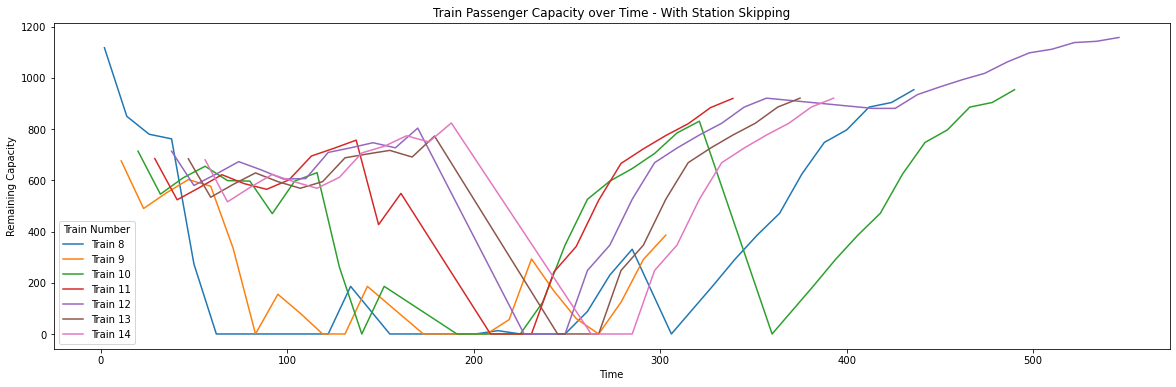

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
sns.lineplot(data = northbound_dataframe.loc[northbound_dataframe['Action'] == 'Onboarded passengers'], x = 'Time', y = 'Remaining Capacity', hue = 'Train Number')
plt.title('Train Passenger Capacity over Time - With Station Skipping')

AttributeError: 'numpy.ndarray' object has no attribute 'append'